### Multiclass Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

#### Prepare synthetic data having clusters for each category/class

In [3]:
# Prepare training data set with 4 categories
classes = 4
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=100, centers=centers, cluster_std=1, random_state=30)

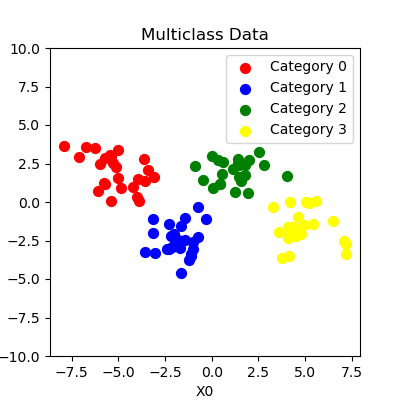

In [4]:
# DO NOT use this function. This is just for illustration, how slow a conventional iteration works. 
# Uncomment the below function call to see how slow this runs.
def plot_data_custom_conventional(X_train, y, custom_colors):
    fig, ax = plt.subplots()
    len_X = X_train.shape[0]
    for i in range(len_X):
        color = custom_colors[y[i]]
        ax.scatter(X_train[i,0], X_train[i,1], c=color)
#def plot_data_custom_conventional(X_train, y, custom_colors):



# This is the preferred way to plot if there is no specific color needed for each category.
# This will plot the data with the colors as per the categories, but the colors are not custom 
# and are randomly allocated.
def plot_data(X_train, y):
    fig, ax = plt.subplots()
    ax.scatter(X_train[:,0], X_train[:,1], c=y)
    ax.set_title('Multiclass Data')
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
#plot_data(X_train, y_train)


# This is the preferred way to plot if there is a specific color needed for each category.
# As fast as above and supports custom colors.
def plot_data_custom_fast(X_train, y, custom_colors, ax):
    for i in range(len(custom_colors)):
       # Create a tuple of four arrays, one for each category. 
       # Each array contains the indices of the elements in X_train that belong to that category
       class_i_indices = np.where(y == i)
       ax.scatter(X_train[class_i_indices,0], X_train[class_i_indices,1], c=custom_colors[i], s=50)
    ax.set_title('Multiclass Data')
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_ylim(-10, 10)
    ax.legend(['Category 0', 'Category 1', 'Category 2', 'Category 3'])

fig, ax = plt.subplots(1,1 , figsize=(4,4))   
colors = ['red', 'blue', 'green', 'yellow']
plot_data_custom_fast(X_train, y_train, colors, ax)


In [5]:
# show classes in data set
print(f"Unique classes = {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show the shape of the data set
print(f"Shape of X_train = {X_train.shape}", f"Shape of y_train = {y_train.shape}")

Unique classes = [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
Shape of X_train = (100, 2) Shape of y_train = (100,)


#### Model

In [6]:
tf.random.set_seed(1234)
model = Sequential(
    layers = [
        Dense(5, activation = 'relu', name = 'L0'),
        Dense(10, activation = 'relu', name = 'L1'),
        Dense(4, activation = 'linear', name = 'L2')
    ]
)

model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

model.fit(
    X_train,
    y_train,
    epochs = 200
)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4972  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 1.2277
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - loss: 1.0594
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - loss: 0.9241
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 0.8024
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 0.6885
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.5740
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - loss: 0.4712
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 0.3717
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 0.2847
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2142  
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 0.1603
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - loss: 0.1212
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.0935
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0737  
Epoc

#### Plot the decision boundary

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step


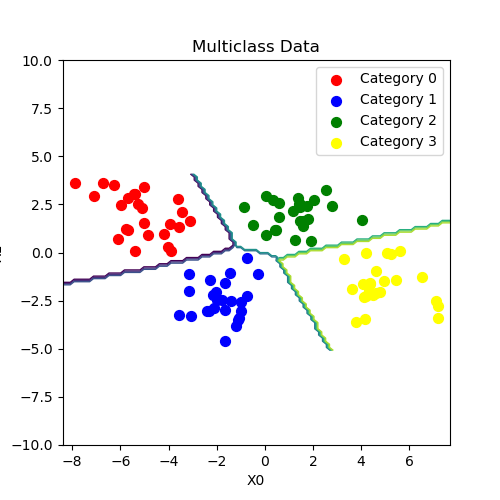

In [7]:
def plot_cat_decision_boundary_mc(ax, X, predict, vector=True):

    # create a mesh to points to plot
    x_min, x_max = X[:, 0].min()- 0.5, X[:, 0].max()+0.5
    y_min, y_max = X[:, 1].min()- 0.5, X[:, 1].max()+0.5
    h = max(x_max-x_min, y_max-y_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    points = np.c_[xx.ravel(), yy.ravel()]
    #print("points", points.shape)
    #print("xx.shape", xx.shape)

    #make predictions for each point in mesh
    if vector:
        Z = predict(points)
    else:
        Z = np.zeros((len(points),))
        for i in range(len(points)):
            Z[i] = predict(points[i].reshape(1,2))
    Z = Z.reshape(xx.shape)

    #contour plot highlights boundaries between values - classes in this case
    ax.contour(xx, yy, Z, linewidths=1) 
    #ax.axis('tight')

def plt_prediction(X_train, y_train, model, classes):
    model_predict = lambda Xl: np.argmax(model.predict(Xl), axis = 1)
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    plot_data_custom_fast(X_train, y_train, colors, ax)
    plot_cat_decision_boundary_mc(ax, X_train, model_predict)


plt_prediction(X_train, y_train, model, classes)

#### Get the weights and biases of the model

In [78]:
# Gather trained parameters from first layer 
l1 = model.get_layer('L1')
W1, b1 = l1.get_weights()